['np', 'DET1', 'DET1E']
88.0914
16642.8770419
63.2378742286
1.0


<IPython.core.display.Javascript object>


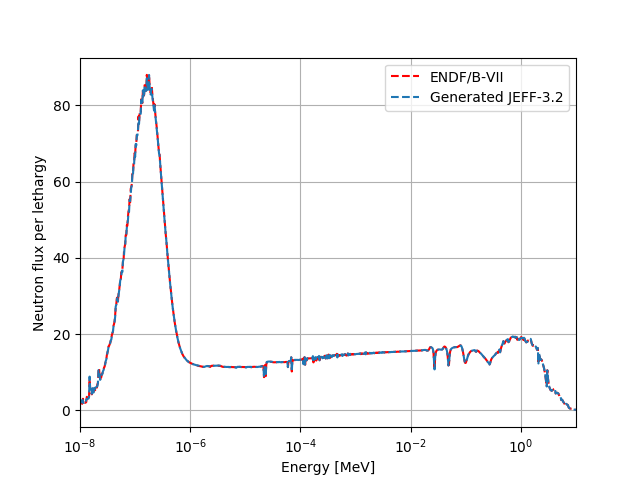

In [2]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
from pyne import serpent
from pyne import nucname

#det0 = serpent.parse_det('../neutronics_paper/reproc/core_det0.m')
det0 = serpent.parse_det('../library_tests/core_det0.m')

det10 = serpent.parse_det('../library_tests/jeff32_core_det0.m')
#det10 = serpent.parse_det('/home/andrei2/Desktop/git/msr-neutronics/RobertsonMSBR/neutronics_paper/reproc/eoc/core_det0.m')
energy_grid = det0['DET1E']
spectrum_grid = det0['DET1']
spectrum_grid2 = det10['DET1']
energy = energy_grid[:,2]
flux_spectrum = spectrum_grid[:,10]
print list(det0.keys())
print np.amax(spectrum_grid[:,10])
print np.sum(spectrum_grid[:,10])
print np.trapz(spectrum_grid[:,10],energy)
y = spectrum_grid[:,10]/np.trapz(spectrum_grid[:,10],energy)
print np.trapz(y,energy)
#print energy
#print flux_spectrum
csv = np.genfromtxt ('park_spectra_2.csv', delimiter=",")
energy_p = csv[:,0]
spectrum_p = csv[:,1]

# Initialize figure
fig_1 = matplotlib.pyplot.figure(1)
ax = fig_1.add_subplot(111)
ax.grid(True)
#ax.set_ylim(0,1.25)
ax.set_xlim([1e-8,10])
ax.semilogx(energy, spectrum_grid[:,10], '--', label='ENDF/B-VII', color='red')
ax.semilogx(energy, spectrum_grid2[:,10], '--', label='Generated JEFF-3.2')
#ax.semilogx(energy_p, spectrum_p, '-', label='MCNP6 (Park et al. 2015 [4])')
ax.legend(loc=0)
ax.set_ylabel('Neutron flux per lethargy')
ax.set_xlabel('Energy [MeV]')
#ax.set_title(plot_title)
fig_1.show()
#fig_1.savefig('/home/andrei2/Desktop/git/publications/2017-msbr-reproc/figures/spectrum.png',bbox_inches='tight')